<a href="https://colab.research.google.com/github/ghozali27/My-project-2024/blob/main/sebelum_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_predict
import joblib


import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('Medicaldataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart Attack Dataset/Medicaldataset.csv')
df = heart.copy()
df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
7,63,1,60,214,82,87.0,300.00,2.370,positive
8,44,0,60,154,81,135.0,2.35,0.004,negative
9,67,1,61,160,95,100.0,2.84,0.011,negative


In [ ]:
#mengubah kolom kategoris menjadi kolom numerik
label_encoder = LabelEncoder()
label_encoder.fit(df["Result"])
class_mapping = dict(zip(label_encoder.classes_,
                label_encoder.transform(label_encoder.classes_)))
print(class_mapping)
df["Result"] = label_encoder.transform(df["Result"])

# Menentukan fitur (X) dan target (y)
x = df.drop('Result', axis=1) # Fitur
y = df['Result'] # Target

# Melakukan split data
# Model A (90:10)
x_train_A, x_test_A, y_train_A, y_test_A = train_test_split(x, y, test_size=0.1, random_state=42)
print("Model A:")
print("Jumlah data train:", len(x_train_A))
print("Jumlah data test:", len(x_test_A))

# Model B (80:20)
x_train_B, x_test_B, y_train_B, y_test_B = train_test_split(x, y, test_size=0.2, random_state=42)
print("\nModel B:")
print("Jumlah data train:", len(x_train_B))
print("Jumlah data test:", len(x_test_B))

# Model C (70:30)
x_train_C, x_test_C, y_train_C, y_test_C = train_test_split(x, y, test_size=0.3, random_state=42)
print("\nModel C:")
print("Jumlah data train:", len(x_train_C))
print("Jumlah data test:", len(x_test_C))

# Model D (65:35)
x_train_D, x_test_D, y_train_D, y_test_D = train_test_split(x, y, test_size=0.35, random_state=42)
print("\nModel D:")
print("Jumlah data train:", len(x_train_D))
print("Jumlah data test:", len(x_test_D))

# Melakukan transformasi data standard scaling terhadap fitur-fitur numerik
scaler = StandardScaler()
x_train_A_scaled = scaler.fit_transform(x_train_A)
x_test_A_scaled = scaler.transform(x_test_A)
x_train_B_scaled = scaler.fit_transform(x_train_B)
x_test_B_scaled = scaler.transform(x_test_B)
x_train_C_scaled = scaler.fit_transform(x_train_C)
x_test_C_scaled = scaler.transform(x_test_C)
x_train_D_scaled = scaler.fit_transform(x_train_D)
x_test_D_scaled = scaler.transform(x_test_D)

# Menampilkan tabel normalisasi
x_train_A_df = pd.DataFrame(x_train_A, columns=x.columns)
x_train_A_scaled_df = pd.DataFrame(x_train_A_scaled, columns=x.columns)
print("\nData Sebelum Normalisasi (Model A):")
print(x_train_A_df.head())
print("\nData Setelah Normalisasi (Model A):")
print(x_train_A_scaled_df.head())

x_train_B_df = pd.DataFrame(x_train_B, columns=x.columns)
x_train_B_scaled_df = pd.DataFrame(x_train_B_scaled, columns=x.columns)
print("\nData Sebelum Normalisasi (Model B):")
print(x_train_B_df.head())
print("\nData Setelah Normalisasi (Model B):")
print(x_train_B_scaled_df.head())

x_train_C_df = pd.DataFrame(x_train_C, columns=x.columns)
x_train_C_scaled_df = pd.DataFrame(x_train_C_scaled, columns=x.columns)
print("\nData Sebelum Normalisasi (Model C):")
print(x_train_C_df.head())
print("\nData Setelah Normalisasi (Model C):")
print(x_train_C_scaled_df.head())

x_train_D_df = pd.DataFrame(x_train_D, columns=x.columns)
x_train_D_scaled_df = pd.DataFrame(x_train_D_scaled, columns=x.columns)
print("\nData Sebelum Normalisasi (Model D):")
print(x_train_D_df.head())
print("\nData Setelah Normalisasi (Model D):")
print(x_train_D_scaled_df.head())

# Menggunakan GridSearchCV untuk mencari parameter terbaik untuk Model A
param_grid_A = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_model_A = GaussianNB()
grid_search_A = GridSearchCV(nb_model_A, param_grid_A, cv=10)
grid_search_A.fit(x_train_A, y_train_A)

# Menampilkan parameter terbaik Model A
print("Parameter terbaik Model A:", grid_search_A.best_params_)

# Menampilkan skor validasi silang terbaik Model A
print("Skor validasi silang terbaik Model A:", grid_search_A.best_score_)

# Menampilkan model terbaik Model A
best_model_A = grid_search_A.best_estimator_
print("Model terbaik Model A:")
print(best_model_A)

# Menggunakan GridSearchCV untuk mencari parameter terbaik untuk Model B
param_grid_B = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_model_B = GaussianNB()
grid_search_B = GridSearchCV(nb_model_B, param_grid_B, cv=10)
grid_search_B.fit(x_train_B, y_train_B)

# Menampilkan parameter terbaik Model B
print("\nParameter terbaik Model B:", grid_search_B.best_params_)

# Menampilkan skor validasi silang terbaik Model B
print("Skor validasi silang terbaik Model B:", grid_search_B.best_score_)

# Menampilkan model terbaik Model B
best_model_B = grid_search_B.best_estimator_
print("Model terbaik Model B:")
print(best_model_B)

# Menggunakan GridSearchCV untuk mencari parameter terbaik untuk Model C
param_grid_C = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_model_C = GaussianNB()
grid_search_C = GridSearchCV(nb_model_C, param_grid_C, cv=10)
grid_search_C.fit(x_train_C, y_train_C)

# Menampilkan parameter terbaik Model C
print("\nParameter terbaik Model C:", grid_search_C.best_params_)

# Menampilkan skor validasi silang terbaik Model C
print("Skor validasi silang terbaik Model C:", grid_search_C.best_score_)

# Menampilkan model terbaik Model C
best_model_C = grid_search_C.best_estimator_
print("Model terbaik Model C:")
print(best_model_C)

# Menggunakan GridSearchCV untuk mencari parameter terbaik untuk Model D
param_grid_D = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_model_D = GaussianNB()
grid_search_D = GridSearchCV(nb_model_D, param_grid_D, cv=10)
grid_search_D.fit(x_train_D, y_train_D)

# Menampilkan parameter terbaik Model D
print("\nParameter terbaik Model D:", grid_search_D.best_params_)

# Menampilkan skor validasi silang terbaik Model D
print("Skor validasi silang terbaik Model D:", grid_search_D.best_score_)

# Menampilkan model terbaik Model D
best_model_D = grid_search_D.best_estimator_
print("Model terbaik Model D:")
print(best_model_D)




{'negative': 0, 'positive': 1}
Model A:
Jumlah data train: 1187
Jumlah data test: 132

Model B:
Jumlah data train: 1055
Jumlah data test: 264

Model C:
Jumlah data train: 923
Jumlah data test: 396

Model D:
Jumlah data train: 857
Jumlah data test: 462

Data Sebelum Normalisasi (Model A):
      Age  Gender  Heart rate  Systolic blood pressure  \
1090   75       0          63                      110   
793    56       0          94                      157   
351    69       1         119                      113   
259    44       1          71                      143   
855    65       1          67                      177   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin  
1090                        59        111.0   1.80     0.043  
793                         79        108.0   3.96     0.005  
351                         79        184.0   8.87     0.005  
259                         71        104.0   1.19     0.070  
855                        105        120.0   3

In [ ]:
def initiate_model(model, x_train_A, x_test_A, y_train_A, y_test_A):
    y_pred_A = model.fit(x_train_A, y_train_A).predict(x_test_A)
    accuracy = accuracy_score(y_test_A, y_pred_A)
    print("Accuracy:", accuracy)
    print('#'*60)
    print((model.__class__.__name__).center(60,' '))
    print('#'*60)
    print('Number of mislabeled points out of a total {} points : {} \n'.format(x_test_A.shape[0], (y_test_A != y_pred_A).sum()))
    print(classification_report(y_test_A, y_pred_A, target_names=['0','1'], zero_division='warn'))
    print('#'*60)

    # Melakukan evaluasi dengan confusion matrix
    cm = confusion_matrix(y_test_A, y_pred_A)
    df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )
    f,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df1, annot=True,cmap="Purples", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)

    # tampilkan hasil
    y_pred_A = model.predict(x_test_A)

    # Membuat DataFrame dari data test dan hasil prediksi
    df_result_A = pd.DataFrame({'Actual': y_test_A, 'Predicted': y_pred_A})

    # Menampilkan tabel hasil prediksi beserta atribut-atribut datanya
    print("Hasil Model A:")
    print(df_result_A)

    # Menampilkan jumlah hasil aktual dan prediksi
    print("\nJumlah hasil aktual:")
    print(df_result_A['Actual'].value_counts())
    print("\nJumlah hasil prediksi:")
    print(df_result_A['Predicted'].value_counts())

    # Menampilkan jumlah prediksi yang salah
    incorrect_predictions = df_result_A[df_result_A['Actual'] != df_result_A['Predicted']]
    print("\nJumlah prediksi yang salah:", len(incorrect_predictions))
    print('#'*60)

Accuracy: 0.6818181818181818
############################################################
                         GaussianNB                         
############################################################
Number of mislabeled points out of a total 132 points : 42 

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        50
           1       1.00      0.49      0.66        82

    accuracy                           0.68       132
   macro avg       0.77      0.74      0.68       132
weighted avg       0.83      0.68      0.67       132

############################################################
Hasil Model A:
      Actual  Predicted
677        1          1
1046       0          0
610        0          0
49         0          0
1284       1          0
...      ...        ...
898        1          1
963        1          0
932        1          0
578        1          1
409        0          0

[132 rows x 2 columns]

Jumlah hasi

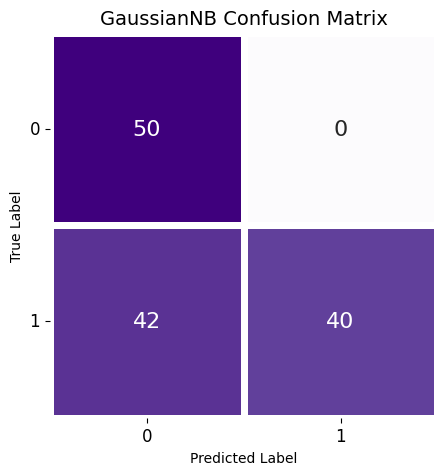

In [ ]:
plt.show()
initiate_model(GaussianNB(), x_train_A, x_test_A, y_train_A, y_test_A)

In [ ]:
def initiate_model(model,x_train_B, x_test_B, y_train_B, y_test_B):
    y_pred_B = model.fit(x_train_B, y_train_B).predict(x_test_B)
    accuracy = accuracy_score(y_test_B, y_pred_B)
    print("Accuracy:", accuracy)
    print('#'*60)
    print((model.__class__.__name__).center(60,' '))
    print('#'*60)
    print('Number of mislabeled points out of a total {} points : {} \n'.format(x_test_B.shape[0], (y_test_B != y_pred_B).sum()))
    print(classification_report(y_test_B, y_pred_B, target_names=['0','1'], zero_division='warn'))
    print('#'*60)

    # Melakukan evaluasi dengan confusion matrix
    cm = confusion_matrix(y_test_B, y_pred_B)
    df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )
    f,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df1, annot=True,cmap="Purples", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)

    # tampilkan hasil
    y_pred_B = model.predict(x_test_B)

    # Membuat DataFrame dari data test dan hasil prediksi
    df_result_B = pd.DataFrame({'Actual': y_test_B, 'Predicted': y_pred_B})

    # Menampilkan tabel hasil prediksi beserta atribut-atribut datanya
    print("Hasil Model B:")
    print(df_result_B)

    # Menampilkan jumlah hasil aktual dan prediksi
    print("\nJumlah hasil aktual:")
    print(df_result_B['Actual'].value_counts())
    print("\nJumlah hasil prediksi:")
    print(df_result_B['Predicted'].value_counts())

    # Menampilkan jumlah prediksi yang salah
    incorrect_predictions = df_result_B[df_result_B['Actual'] != df_result_B['Predicted']]
    print("\nJumlah prediksi yang salah:", len(incorrect_predictions))
    print('#'*60)

Accuracy: 0.7878787878787878
############################################################
                         GaussianNB                         
############################################################
Number of mislabeled points out of a total 264 points : 56 

              precision    recall  f1-score   support

           0       0.65      0.99      0.78       101
           1       0.99      0.66      0.79       163

    accuracy                           0.79       264
   macro avg       0.82      0.83      0.79       264
weighted avg       0.86      0.79      0.79       264

############################################################
Hasil Model B:
      Actual  Predicted
677        1          1
1046       0          0
610        0          0
49         0          0
1284       1          0
...      ...        ...
1176       0          0
1002       0          0
1159       1          0
542        1          1
170        1          0

[264 rows x 2 columns]

Jumlah hasi

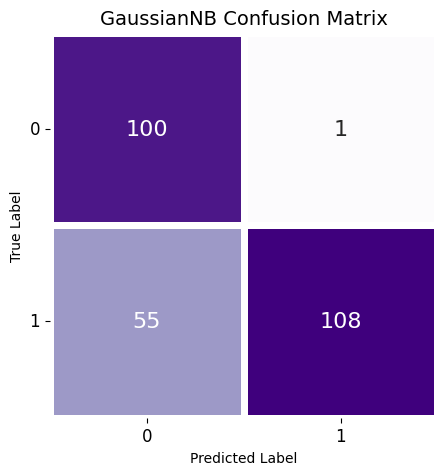

In [ ]:
plt.show()
initiate_model(GaussianNB(), x_train_B, x_test_B, y_train_B, y_test_B)

In [ ]:
def initiate_model(model,x_train_C, x_test_C, y_train_C, y_test_C):
    y_pred_C = model.fit(x_train_C, y_train_C).predict(x_test_C)
    accuracy = accuracy_score(y_test_C, y_pred_C)
    print("Accuracy:", accuracy)
    print('#'*60)
    print((model.__class__.__name__).center(60,' '))
    print('#'*60)
    print('Number of mislabeled points out of a total {} points : {} \n'.format(x_test_C.shape[0], (y_test_C != y_pred_C).sum()))
    print(classification_report(y_test_C, y_pred_C, target_names=['0','1'], zero_division='warn'))
    print('#'*60)

    # Melakukan evaluasi dengan confusion matrix
    cm = confusion_matrix(y_test_C, y_pred_C)
    df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )
    f,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df1, annot=True,cmap="Purples", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)

    # tampilkan hasil
    y_pred_C = model.predict(x_test_C)

    # Membuat DataFrame dari data test dan hasil prediksi
    df_result_C = pd.DataFrame({'Actual': y_test_C, 'Predicted': y_pred_C})

    # Menampilkan tabel hasil prediksi beserta atribut-atribut datanya
    print("Hasil Model C:")
    print(df_result_C)

    # Menampilkan jumlah hasil aktual dan prediksi
    print("\nJumlah hasil aktual:")
    print(df_result_C['Actual'].value_counts())
    print("\nJumlah hasil prediksi:")
    print(df_result_C['Predicted'].value_counts())

    # Menampilkan jumlah prediksi yang salah
    incorrect_predictions = df_result_C[df_result_C['Actual'] != df_result_C['Predicted']]
    print("\nJumlah prediksi yang salah:", len(incorrect_predictions))
    print('#'*60)

Accuracy: 0.8939393939393939
############################################################
                         GaussianNB                         
############################################################
Number of mislabeled points out of a total 396 points : 42 

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       155
           1       0.99      0.83      0.91       241

    accuracy                           0.89       396
   macro avg       0.89      0.91      0.89       396
weighted avg       0.91      0.89      0.90       396

############################################################
Hasil Model C:
      Actual  Predicted
677        1          1
1046       0          0
610        0          0
49         0          0
1284       1          0
...      ...        ...
141        0          0
1169       1          1
613        1          1
543        1          1
139        0          0

[396 rows x 2 columns]

Jumlah hasi

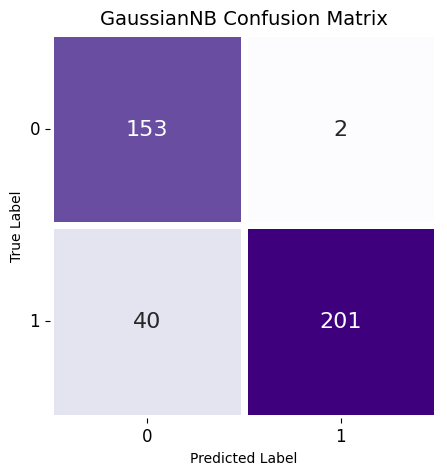

In [ ]:
plt.show()
initiate_model(GaussianNB(), x_train_C, x_test_C, y_train_C, y_test_C)

In [ ]:
def initiate_model(model,x_train_D, x_test_D, y_train_D, y_test_D):
    y_pred_D = model.fit(x_train_D, y_train_D).predict(x_test_D)
    accuracy = accuracy_score(y_test_D, y_pred_D)
    print("Accuracy:", accuracy)
    print('#'*60)
    print((model.__class__.__name__).center(60,' '))
    print('#'*60)
    print('Number of mislabeled points out of a total {} points : {} \n'.format(x_test_D.shape[0], (y_test_D != y_pred_D).sum()))
    print(classification_report(y_test_D, y_pred_D, target_names=['0','1'], zero_division='warn'))
    print('#'*60)

    # Melakukan evaluasi dengan confusion matrix
    cm = confusion_matrix(y_test_D, y_pred_D)
    df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )
    f,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df1, annot=True,cmap="Purples", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)

    # tampilkan hasil
    y_pred_D = model.predict(x_test_D)

    # Membuat DataFrame dari data test dan hasil prediksi
    df_result_D = pd.DataFrame({'Actual': y_test_D, 'Predicted': y_pred_D})

    # Menampilkan tabel hasil prediksi beserta atribut-atribut datanya
    print("Hasil Model D:")
    print(df_result_D)

    # Menampilkan jumlah hasil aktual dan prediksi
    print("\nJumlah hasil aktual:")
    print(df_result_D['Actual'].value_counts())
    print("\nJumlah hasil prediksi:")
    print(df_result_D['Predicted'].value_counts())

    # Menampilkan jumlah prediksi yang salah
    incorrect_predictions = df_result_D[df_result_D['Actual'] != df_result_D['Predicted']]
    print("\nJumlah prediksi yang salah:", len(incorrect_predictions))
    print('#'*60)

Accuracy: 0.9004329004329005
############################################################
                         GaussianNB                         
############################################################
Number of mislabeled points out of a total 462 points : 46 

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       180
           1       0.99      0.84      0.91       282

    accuracy                           0.90       462
   macro avg       0.90      0.92      0.90       462
weighted avg       0.92      0.90      0.90       462

############################################################
Hasil Model D:
      Actual  Predicted
677        1          1
1046       0          0
610        0          0
49         0          0
1284       1          0
...      ...        ...
893        1          1
5          0          0
100        1          1
424        1          1
772        0          0

[462 rows x 2 columns]

Jumlah hasi

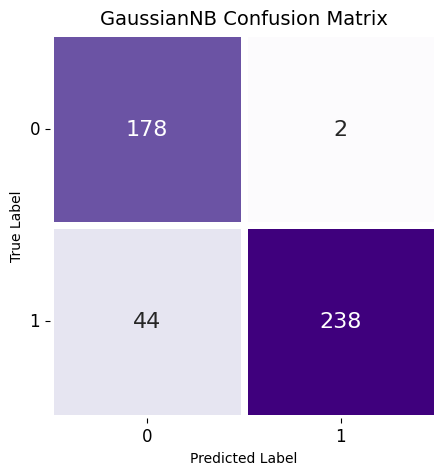

In [ ]:
plt.show()
initiate_model(GaussianNB(), x_train_D, x_test_D, y_train_D, y_test_D)

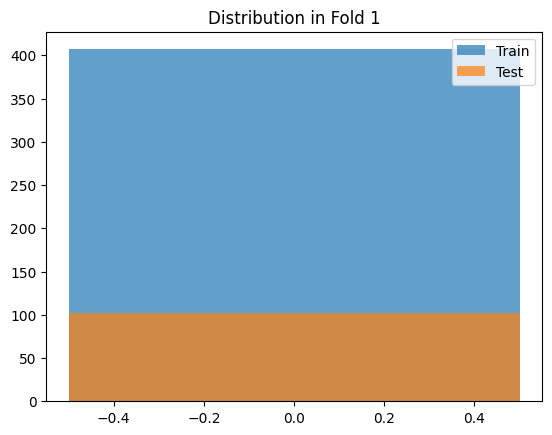

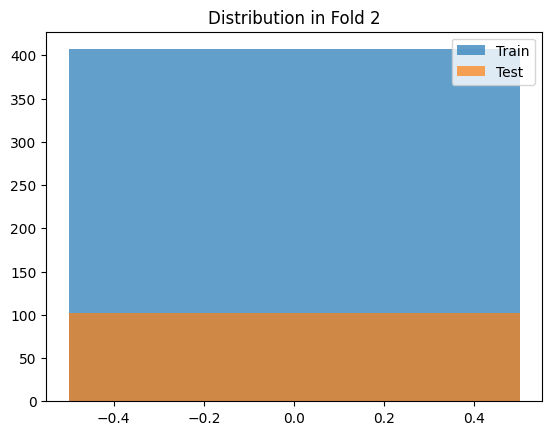

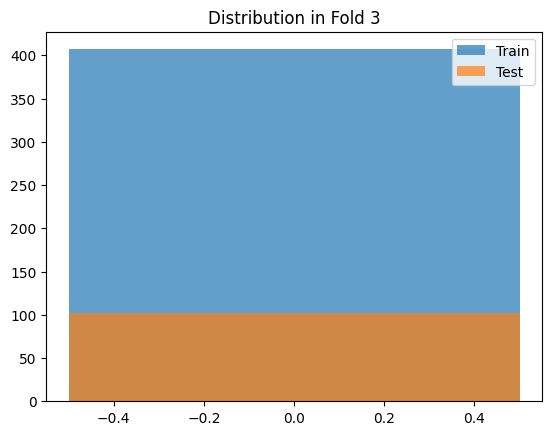

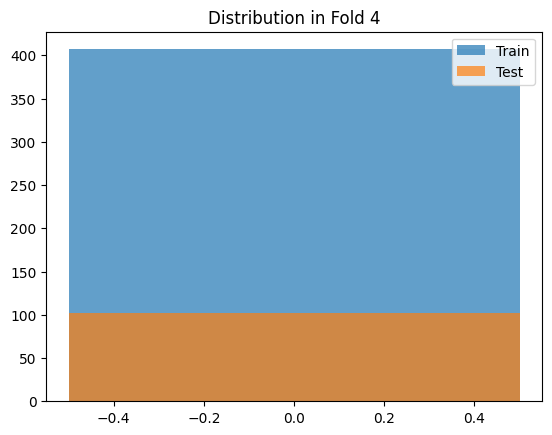

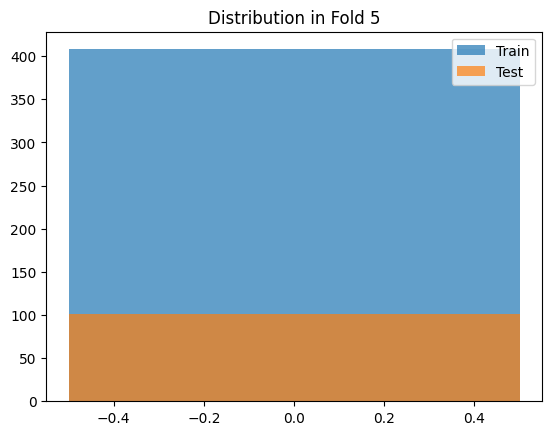

Evaluasi Cross-Validation secara keseluruhan:
Cross-validation scores (cv=5): [0.88257576 0.68181818 0.68560606 0.61742424 0.6539924 ]
Mean CV accuracy (cv=5): 0.7043
############################################################
Confusion Matrix:
[[506   3]
 [387 423]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.99      0.72       509
           1       0.99      0.52      0.68       810

    accuracy                           0.70      1319
   macro avg       0.78      0.76      0.70      1319
weighted avg       0.83      0.70      0.70      1319

############################################################


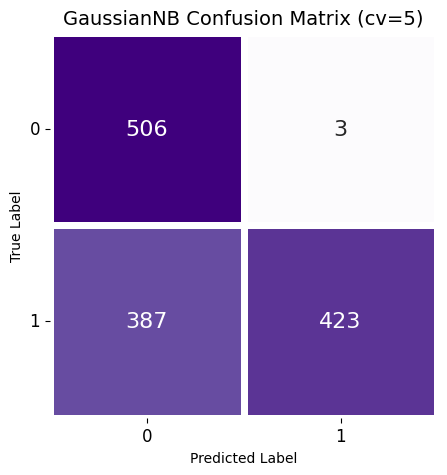

Cross-validation scores (cv=10): [0.77272727 0.64393939 0.63636364 0.72727273 0.6969697  0.71212121
 0.61363636 0.62878788 0.67424242 0.67175573]
Mean CV accuracy (cv=10): 0.6778
############################################################
Confusion Matrix:
[[506   3]
 [422 388]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.99      0.70       509
           1       0.99      0.48      0.65       810

    accuracy                           0.68      1319
   macro avg       0.77      0.74      0.68      1319
weighted avg       0.82      0.68      0.67      1319

############################################################


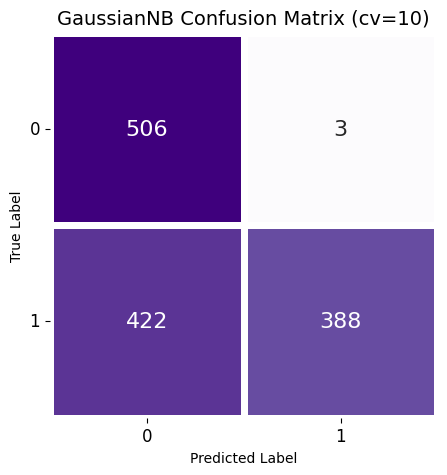

Cross-validation scores (cv=15): [0.75       0.73863636 0.625      0.63636364 0.69318182 0.71590909
 0.72727273 0.68181818 0.68181818 0.63636364 0.57954545 0.65909091
 0.68181818 0.65909091 0.68965517]
Mean CV accuracy (cv=15): 0.6770
############################################################
Confusion Matrix:
[[506   3]
 [423 387]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.99      0.70       509
           1       0.99      0.48      0.65       810

    accuracy                           0.68      1319
   macro avg       0.77      0.74      0.67      1319
weighted avg       0.82      0.68      0.67      1319

############################################################


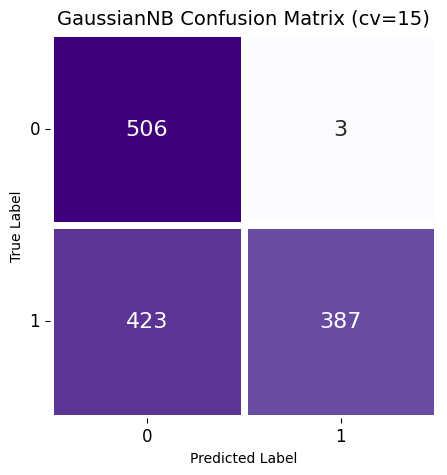

Cross-validation scores (cv=20): [0.75757576 0.71212121 0.6969697  0.63636364 0.60606061 0.66666667
 0.75757576 0.6969697  0.71212121 0.6969697  0.71212121 0.65151515
 0.66666667 0.59090909 0.59090909 0.65151515 0.68181818 0.66666667
 0.71212121 0.63076923]
Mean CV accuracy (cv=20): 0.6747
############################################################
Confusion Matrix:
[[506   3]
 [426 384]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.99      0.70       509
           1       0.99      0.47      0.64       810

    accuracy                           0.67      1319
   macro avg       0.77      0.73      0.67      1319
weighted avg       0.82      0.67      0.67      1319

############################################################


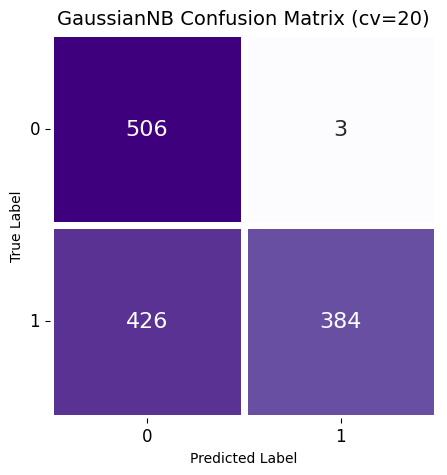

Fold 5 Accuracies: [0.88257576 0.68181818 0.68560606 0.61742424 0.6539924 ]
Mean Accuracy: 0.7043
Standard Deviation: 0.0924
############################################################
Fold 10 Accuracies: [0.77272727 0.64393939 0.63636364 0.72727273 0.6969697  0.71212121
 0.61363636 0.62878788 0.67424242 0.67175573]
Mean Accuracy: 0.6778
Standard Deviation: 0.0474
############################################################
Fold 15 Accuracies: [0.75       0.73863636 0.625      0.63636364 0.69318182 0.71590909
 0.72727273 0.68181818 0.68181818 0.63636364 0.57954545 0.65909091
 0.68181818 0.65909091 0.68965517]
Mean Accuracy: 0.6770
Standard Deviation: 0.0446
############################################################
Fold 20 Accuracies: [0.75757576 0.71212121 0.6969697  0.63636364 0.60606061 0.66666667
 0.75757576 0.6969697  0.71212121 0.6969697  0.71212121 0.65151515
 0.66666667 0.59090909 0.59090909 0.65151515 0.68181818 0.66666667
 0.71212121 0.63076923]
Mean Accuracy: 0.6747
Stand

In [ ]:

# Fungsi untuk visualisasi distribusi data di setiap lipatan
def plot_data_distribution(X, y, n_splits):
    skf = StratifiedKFold(n_splits=n_splits)
    fold = 1
    for train_index, test_index in skf.split(X, y):
        plt.figure()
        plt.hist(y[train_index], bins=np.arange(0, np.max(y)+1)-0.5, alpha=0.7, label='Train')
        plt.hist(y[test_index], bins=np.arange(0, np.max(y)+1)-0.5, alpha=0.7, label='Test')
        plt.title(f'Distribution in Fold {fold}')
        plt.legend()
        plt.show()
        fold += 1

# Fungsi untuk evaluasi model dengan cross-validation
def evaluate_model_cross_validation(model, X, y, cv_folds):
    all_accuracies = []
    for cv in cv_folds:
        cv_scores = cross_val_score(model, X, y, cv=cv)
        all_accuracies.append(cv_scores)
        print(f"Cross-validation scores (cv={cv}): {cv_scores}")
        print(f"Mean CV accuracy (cv={cv}): {cv_scores.mean():.4f}")
        print('#' * 60)

        # Melakukan prediksi dan evaluasi di dalam fungsi
        y_pred = cross_val_predict(model, X, y, cv=cv)
        cm = confusion_matrix(y, y_pred)
        print("Confusion Matrix:")
        print(cm)
        print("Classification Report:")
        print(classification_report(y, y_pred))
        print('#' * 60)

        # Mengonversi confusion matrix ke dalam DataFrame
        df_cm = pd.DataFrame(cm, index=[i for i in range(cm.shape[0])], columns=[i for i in range(cm.shape[1])])

        # Menampilkan confusion matrix sebagai heatmap
        plt.figure(figsize=(5, 5))
        sns.heatmap(df_cm, annot=True, cmap="Purples", fmt='g', linewidths=5, cbar=False, annot_kws={"size": 16})
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"{model.__class__.__name__} Confusion Matrix (cv={cv})", size=14)
        plt.xticks(size=12)
        plt.yticks(size=12, rotation=0)
        plt.show()

    return all_accuracies

# Fungsi untuk evaluasi variabilitas
def evaluate_variability(all_accuracies):
    for i, acc in enumerate(all_accuracies):
        print(f"Fold {cv_folds[i]} Accuracies: {acc}")
        print(f"Mean Accuracy: {np.mean(acc):.4f}")
        print(f"Standard Deviation: {np.std(acc):.4f}")
        print('#' * 60)

# Plot distribusi data untuk K=5
plot_data_distribution(x, y, 5)


# Melakukan cross-validation dengan lipatan 5, 10, 15, 20
cv_folds = [5, 10, 15, 20]
print("Evaluasi Cross-Validation secara keseluruhan:")
all_accuracies = evaluate_model_cross_validation(GaussianNB(), x, y, cv_folds)

# Evaluasi variabilitas
evaluate_variability(all_accuracies)

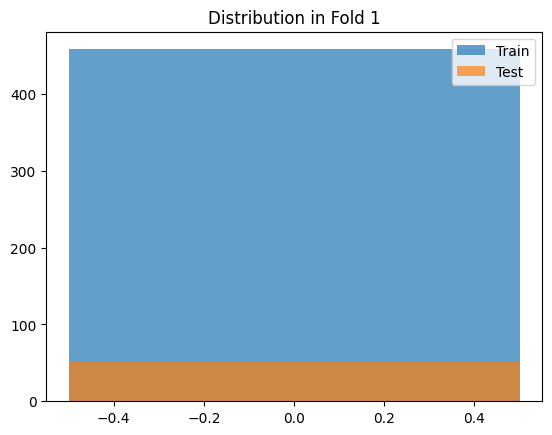

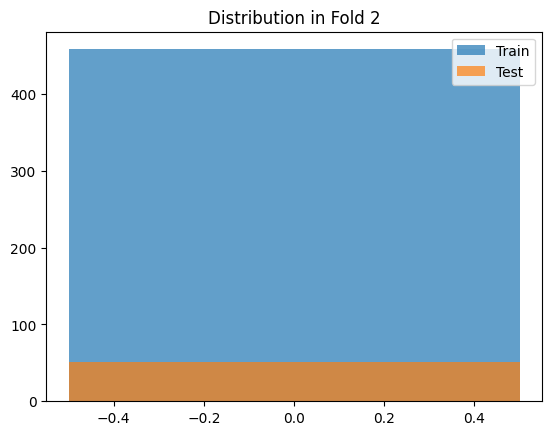

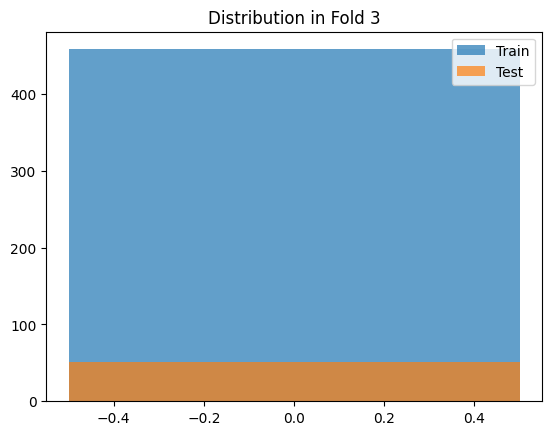

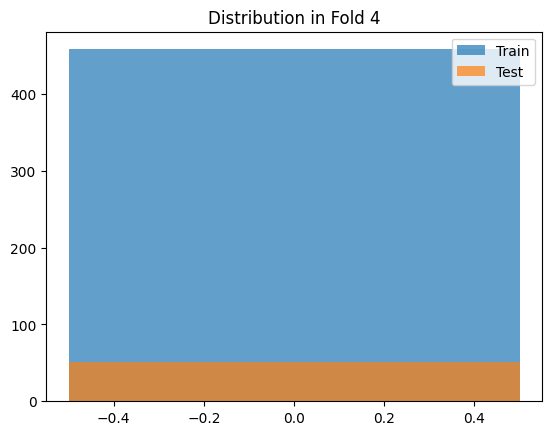

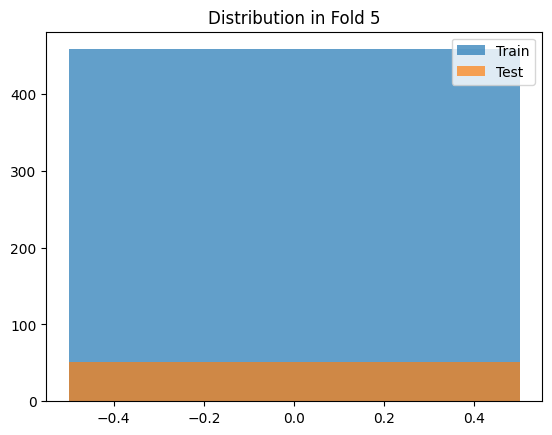

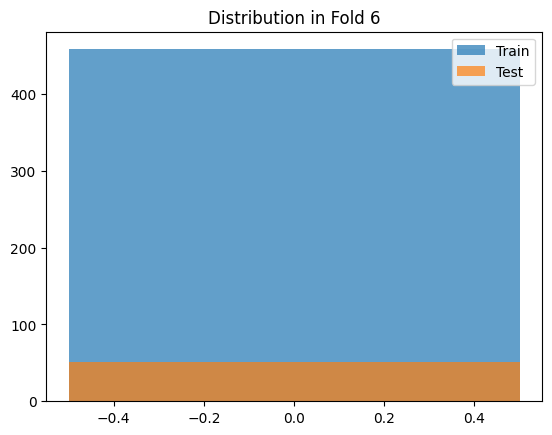

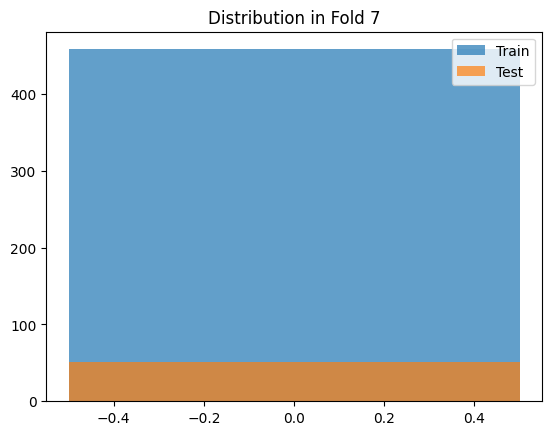

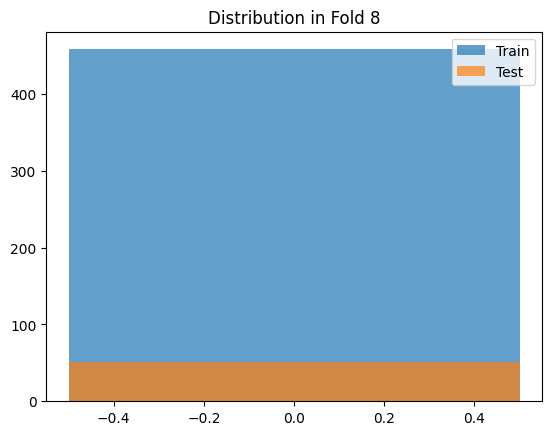

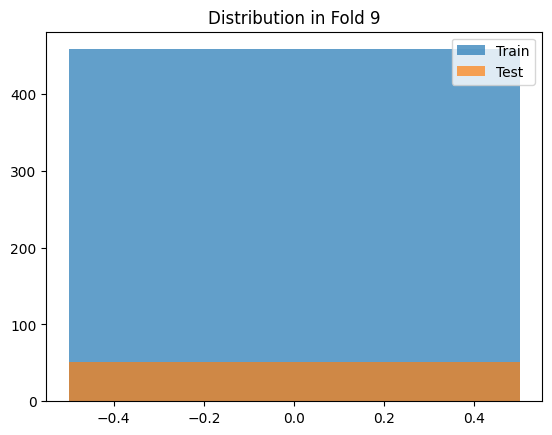

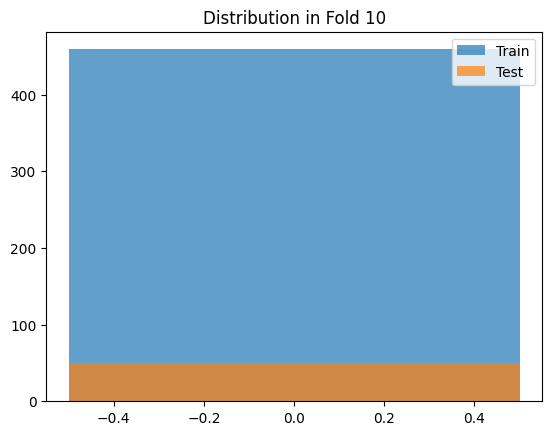

In [ ]:
plot_data_distribution(x, y, 10)


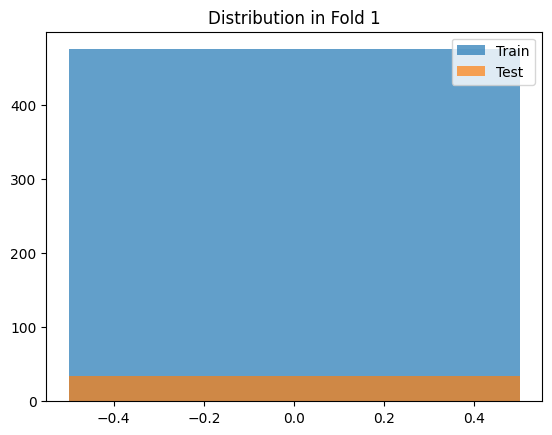

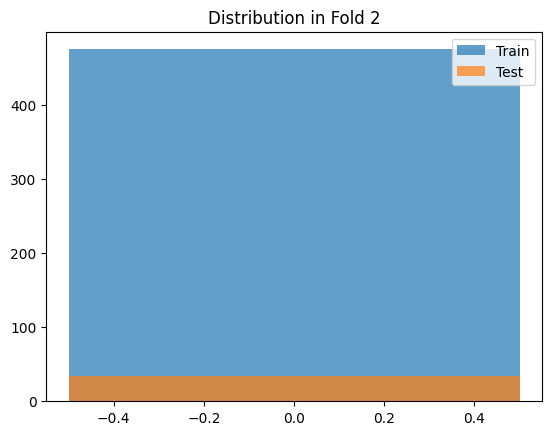

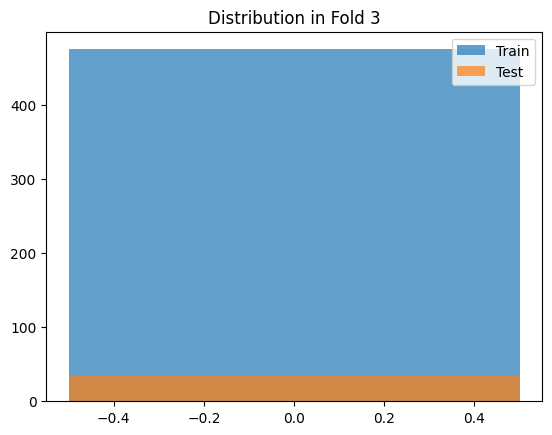

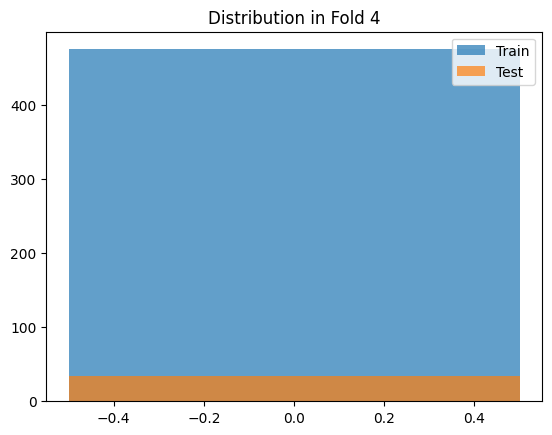

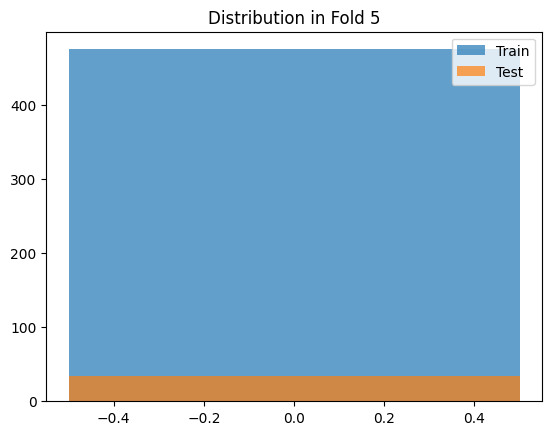

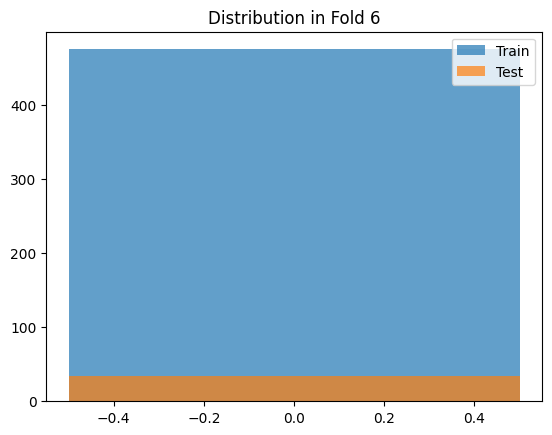

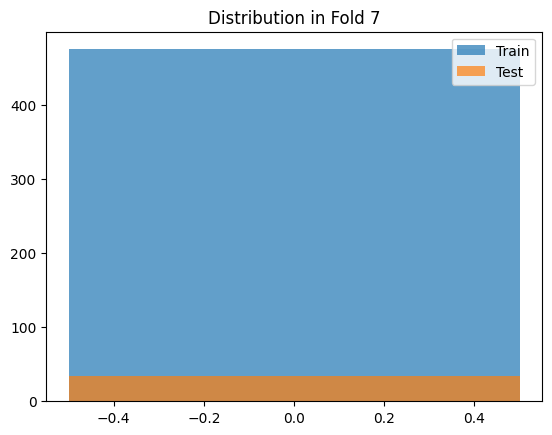

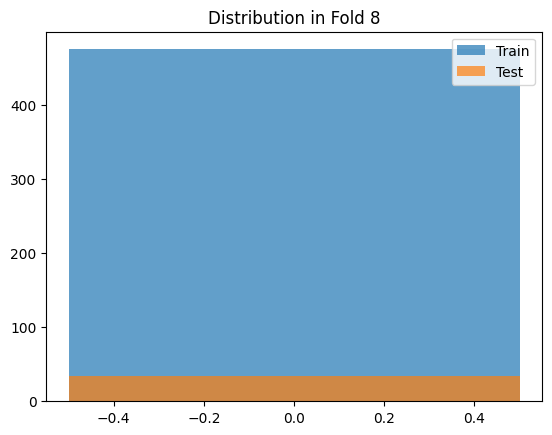

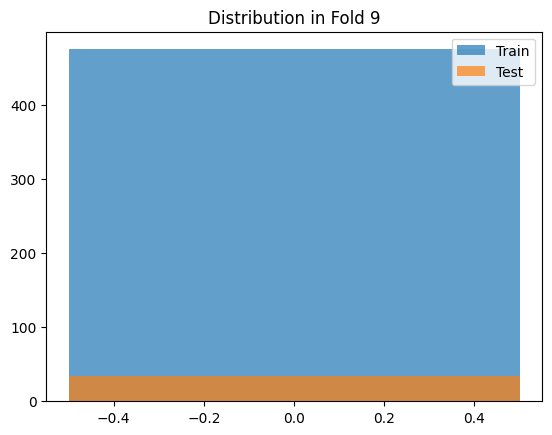

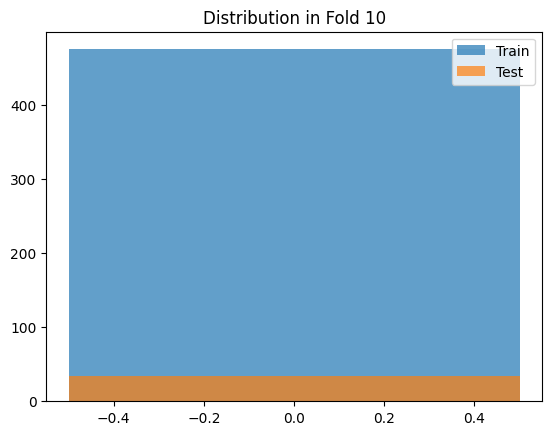

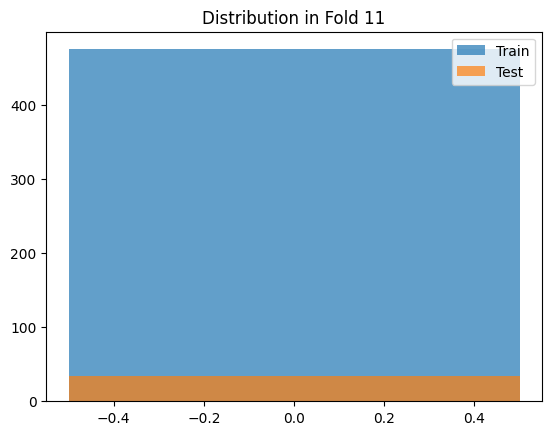

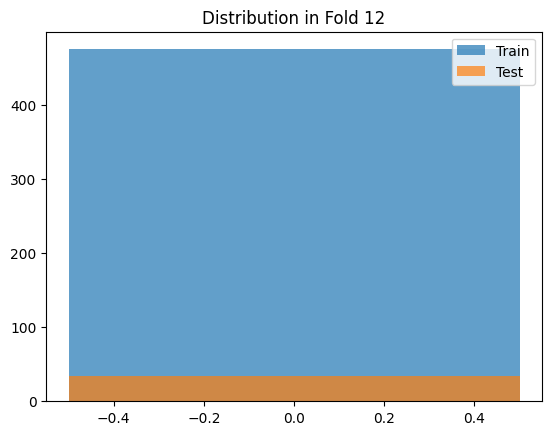

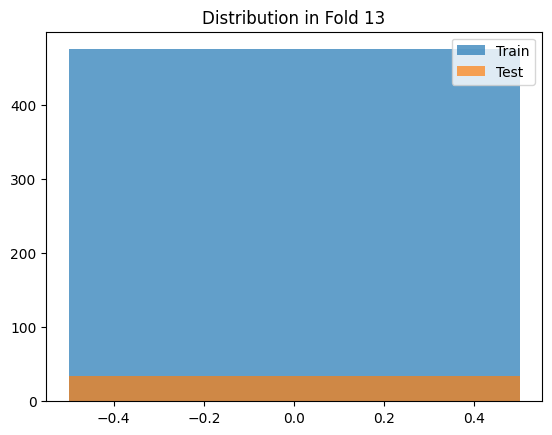

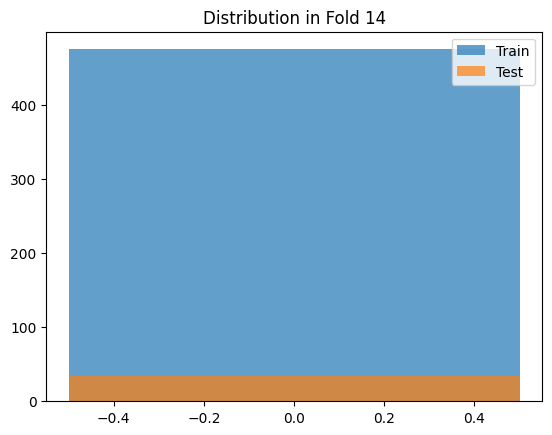

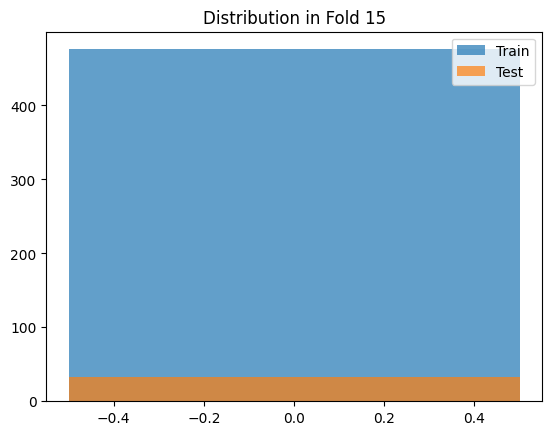

In [ ]:
plot_data_distribution(x, y, 15)

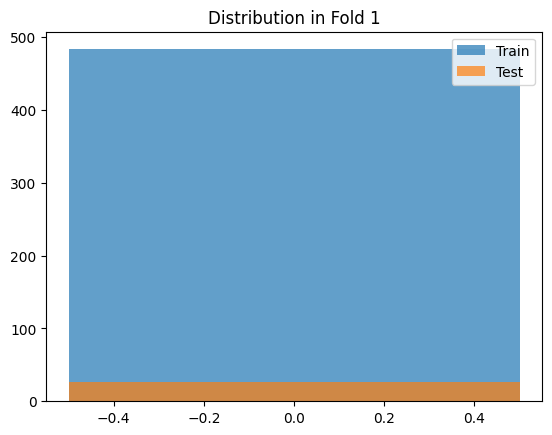

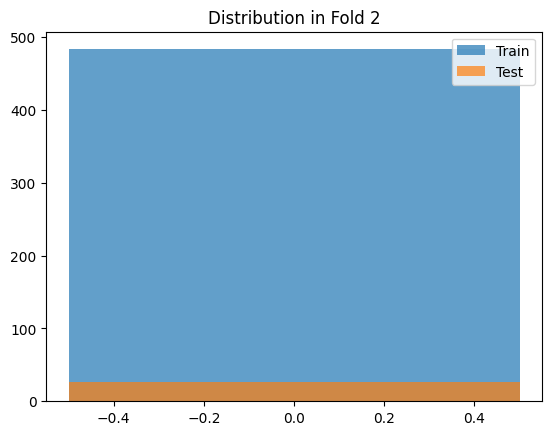

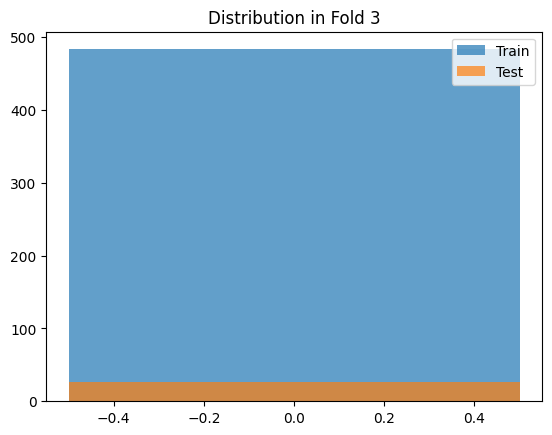

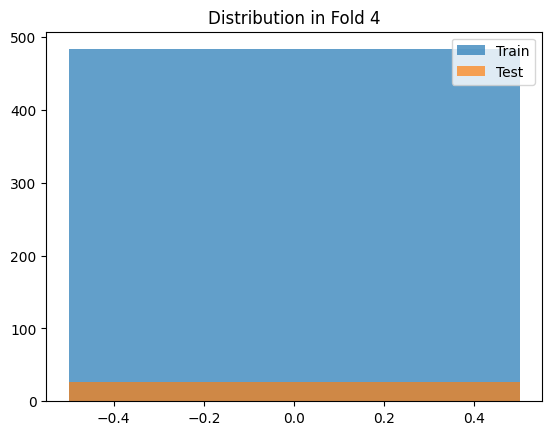

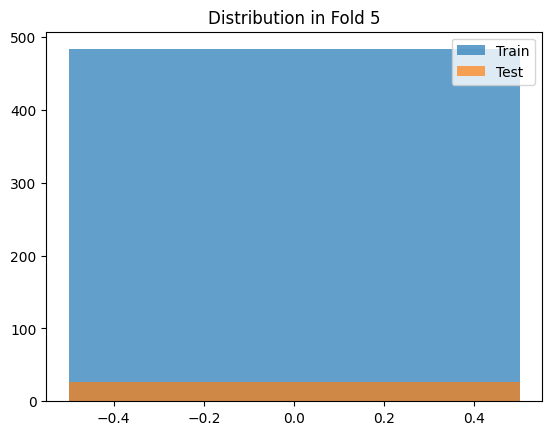

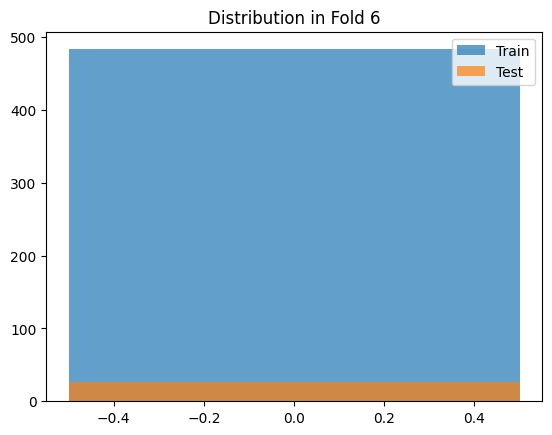

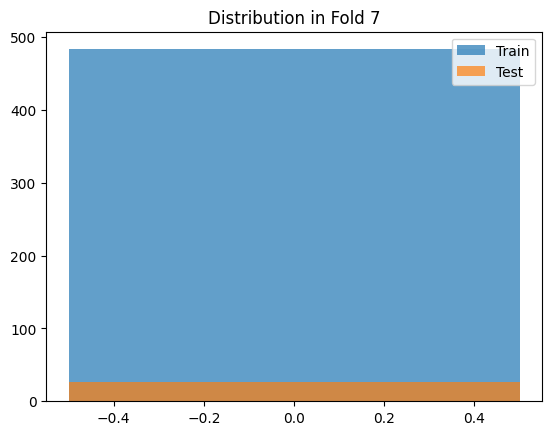

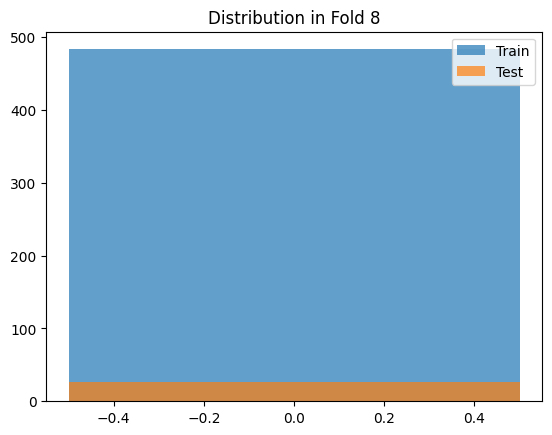

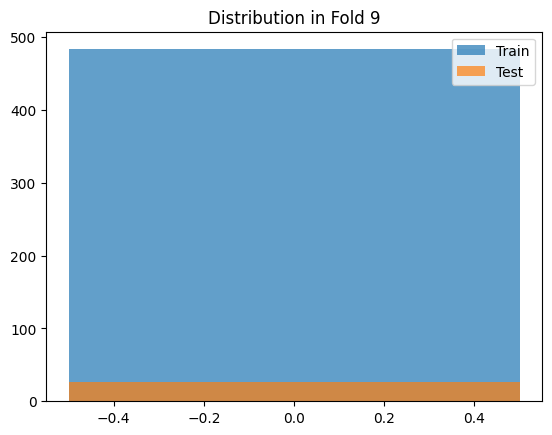

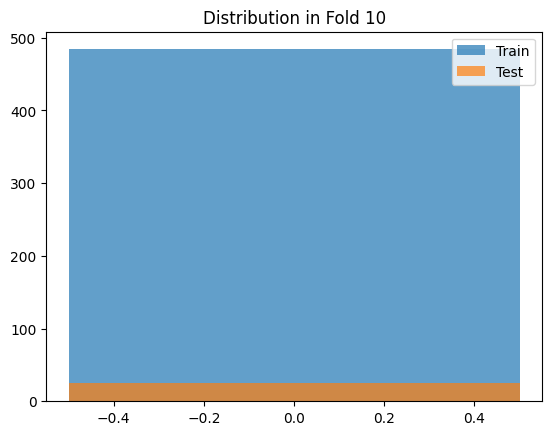

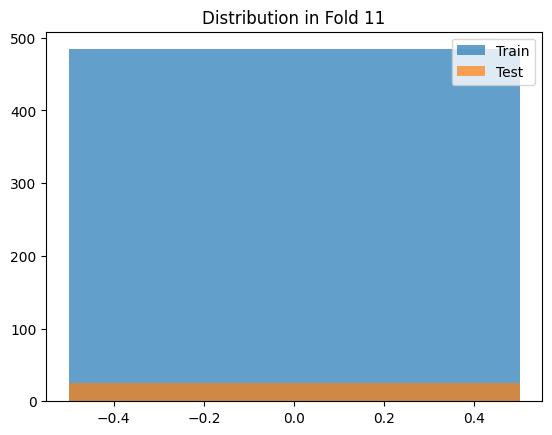

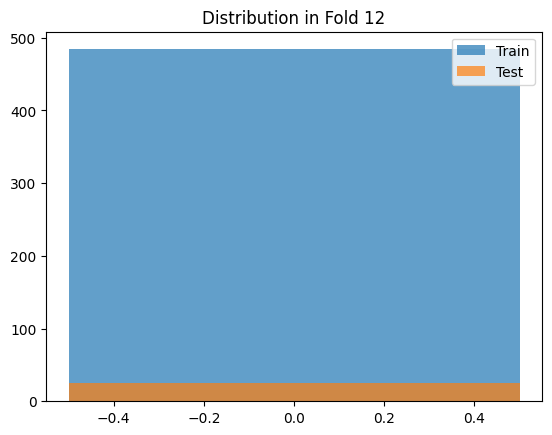

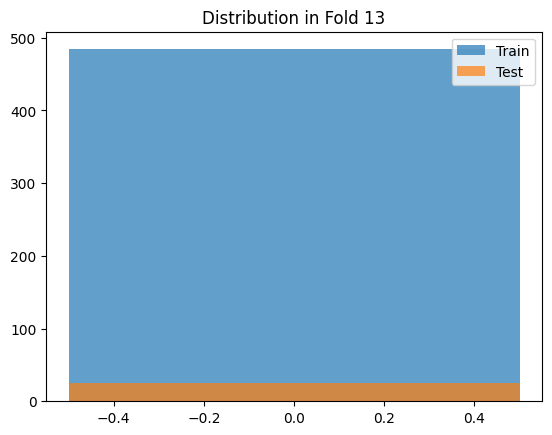

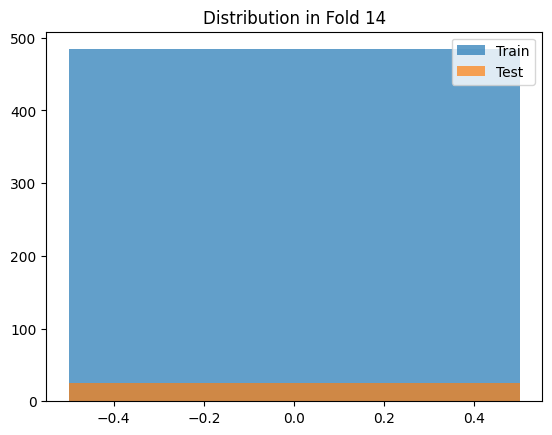

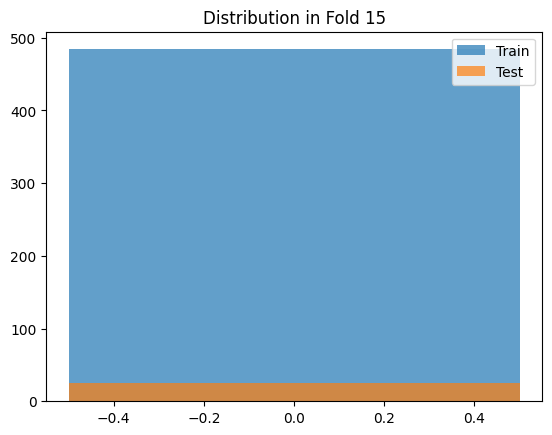

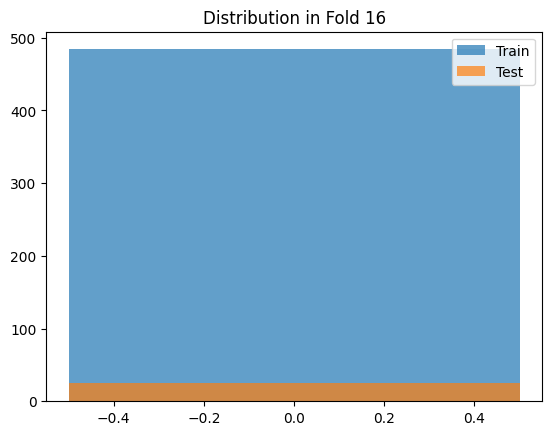

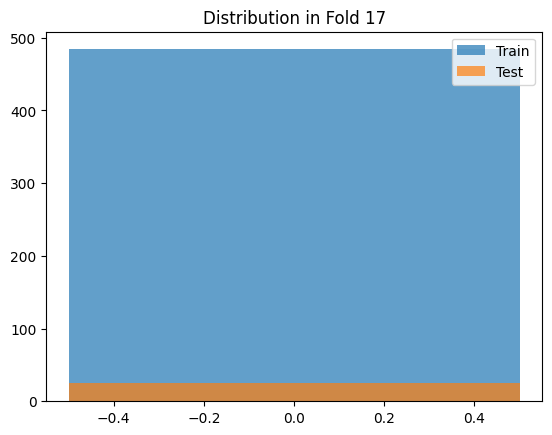

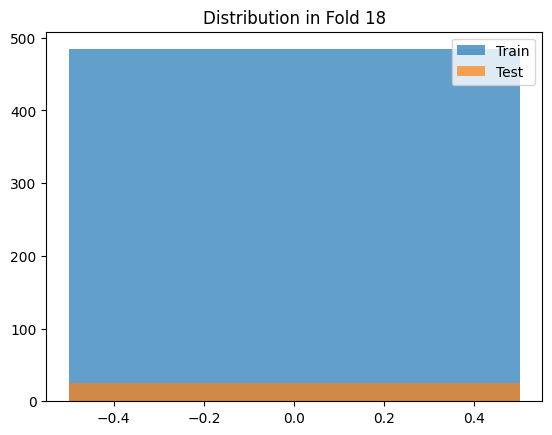

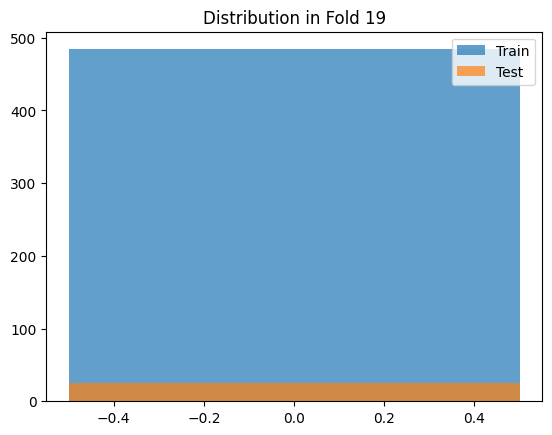

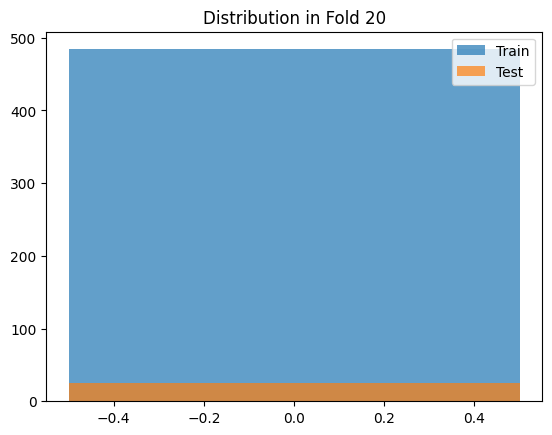

In [ ]:
plot_data_distribution(x, y, 20)

In [ ]:
# Menyimpan model Model A
model_A = GaussianNB()
model_A.fit(x_train_A, y_train_A)
joblib.dump(model_A, 'gaussian_nb_model_A.pkl')
joblib.dump(scaler, 'scaler_A.pkl')

# Menyimpan model Model B
model_B = GaussianNB()
model_B.fit(x_train_B, y_train_B)
joblib.dump(model_B, 'gaussian_nb_model_B.pkl')
joblib.dump(scaler, 'scaler_B.pkl')

# Menyimpan model Model C
model_C = GaussianNB()
model_C.fit(x_train_C, y_train_C)
joblib.dump(model_C, 'gaussian_nb_model_C.pkl')
joblib.dump(scaler, 'scaler_C.pkl')

# Menyimpan model Model D
model_D = GaussianNB()
model_D.fit(x_train_D, y_train_D)
joblib.dump(model_D, 'gaussian_nb_model_D.pkl')
joblib.dump(scaler, 'scaler_D.pkl')


['scaler_D.pkl']